In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt

In [2]:
# Load the data
df = pd.read_csv('dataset/upgraded-sinhala-news-categories.csv')

# Split the data into features (X) and target (y)
X = df['comments']
y = df['labels']

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenize the text
max_words = 10000
max_len = 200

In [3]:
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

In [7]:
# Build the LSTM model
model = Sequential([
    Embedding(max_words, 100, input_length=max_len),
    LSTM(128),
    Dense(32, activation='relu'),
    Dropout(0.6),
    Dense(14, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit(X_train_pad, y_train, epochs=10, batch_size=32, validation_split=0.1, callbacks=[early_stop])

Epoch 1/10


c:\Users\nisha\anaconda3\envs\sinhala-news-classifier\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


163/163 ━━━━━━━━━━━━━━━━━━━━ 11s 61ms/step - accuracy: 0.2539 - loss: 2.2098 - val_accuracy: 0.5536 - val_loss: 1.2070
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 10s 59ms/step - accuracy: 0.5884 - loss: 1.2328 - val_accuracy: 0.7042 - val_loss: 0.9230
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 10s 64ms/step - accuracy: 0.7131 - loss: 0.8550 - val_accuracy: 0.7284 - val_loss: 0.8329
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 10s 63ms/step - accuracy: 0.7911 - loss: 0.6277 - val_accuracy: 0.7388 - val_loss: 0.8260
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 10s 63ms/step - accuracy: 0.8261 - loss: 0.5463 - val_accuracy: 0.7924 - val_loss: 0.7520
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 10s 64ms/step - accuracy: 0.8560 - loss: 0.4724 - val_accuracy: 0.7803 - val_loss: 0.8088
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 11s 65ms/step - accuracy: 0.8766 - loss: 0.3758 - val_accuracy: 0.7872 - val_loss: 0.8694
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 11s 65ms/step - accuracy: 0.8886 - loss: 0.3753 - val_accurac

In [9]:
# Evaluate the model
y_pred = model.predict(X_test_pad)
y_pred_classes = np.argmax(y_pred, axis=1)

accuracy = accuracy_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes, average='weighted')
recall = recall_score(y_test, y_pred_classes, average='weighted')
precision = precision_score(y_test, y_pred_classes, average='weighted')

print(f"F1 Score: {f1:.4f}")
print(f"Accuracy Score: {accuracy:.4f}")
print(f"Precision Score: {precision:.4f}")
print(f"Recall Score: {recall:.4f}")

46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step
F1 Score: 0.7727
Accuracy Score: 0.7958
Precision Score: 0.7574
Recall Score: 0.7958


c:\Users\nisha\anaconda3\envs\sinhala-news-classifier\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


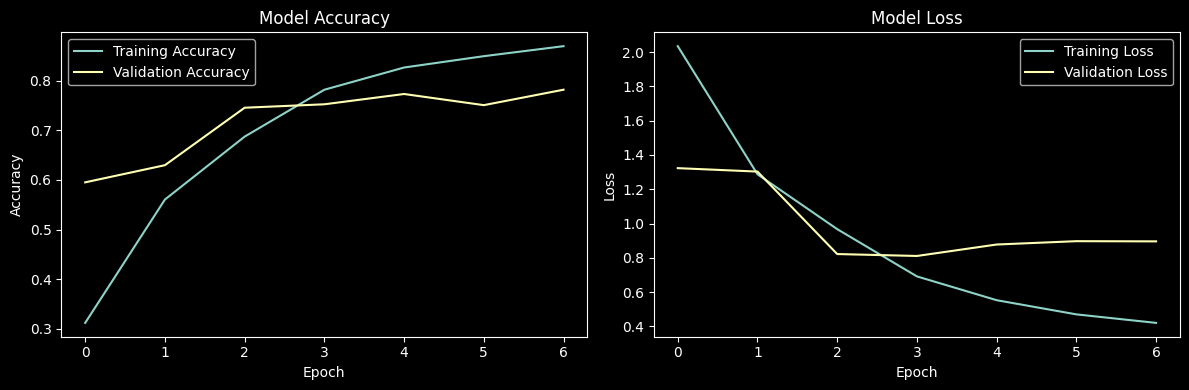

In [6]:


# print("\nClassification Report:")
# print(classification_report(y_test, y_pred_classes, target_names=label_encoder.classes_))

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()